In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import datasets
from sklearn import preprocessing
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
# from sklearn.datasets import load_iris
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Concrete_Data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
X = df.drop(['Concrete compressive strength'], axis = 1)
y = df[['Concrete compressive strength']]
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [4]:
X2 = df.drop(['Age'], axis = 1)
y2 = df[['Age']]
X2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,44.30
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,32.77


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [6]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0) 

# Firstly, I will use PLS, KNN, and SVR directly on the original dataset. 

## PLS for compressive strength:

Text(0.5, 1.0, 'Concrete')

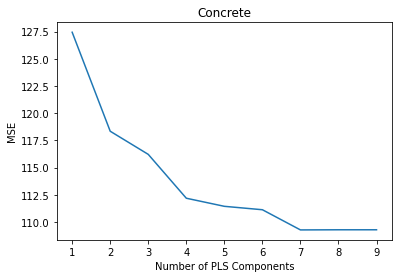

In [7]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(np.arange(1, len(mse)+1), mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Concrete')

In [8]:
tic1 = time.perf_counter()

pls = PLSRegression(n_components=7)
pls.fit(X_train, y_train)

pls_score_row = pls.score(X_test, y_test)
pls_score_row

toc1 = time.perf_counter()

In [9]:
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)

pls_score_scale = pls.score(scale(X_test), y_test)
pls_score_scale

0.6049796165833623

In [10]:
pls = PLSRegression(n_components=7)
pls.fit(X_train, y_train)

y_predict = pls.predict(X_test)
pls_mse_row = mean_squared_error(y_test, y_predict)
pls_mse_row

95.67917413556947

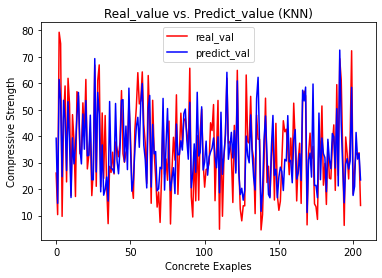

In [11]:
plt.plot(range(len(y_test)), y_test, '-r', label='real_val')
plt.plot(range(len(y_test)), y_predict, '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Compressive Strength')
plt.title('Real_value vs. Predict_value (KNN)')
plt.legend()
plt.show()

In [12]:
z = [x for _, x in sorted(zip(np.array(y_test), y_predict), key=lambda pair: pair[0])]
# np.array(z)[:, 0]

In [13]:
# np.sort(np.array(y_test)[:, 0])

In [14]:
mean_squared_error(np.array(z)[:, 0], np.sort(np.array(y_test)[:, 0]))

95.67917413556947

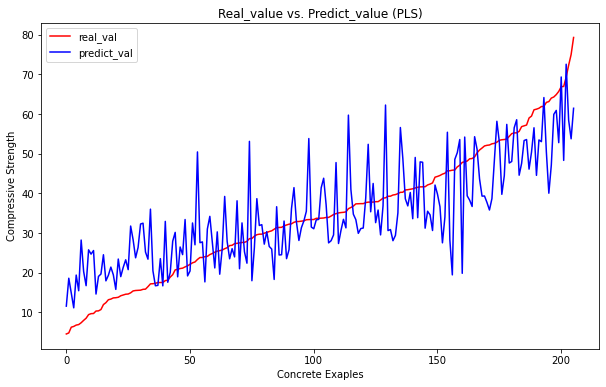

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), np.sort(np.array(y_test)[:, 0]), '-r', label='real_val')
plt.plot(range(len(y_test)), np.array(z)[:, 0], '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Compressive Strength')
plt.title('Real_value vs. Predict_value (PLS)')
plt.legend()
plt.show()

In [16]:
print('PLS score on raw data:', pls_score_row)
print('PLS score on scale data:', pls_score_scale)
print('MSE for row data:', pls_mse_row)
print(f"Running time in {toc1 - tic1:0.4f} seconds")

PLS score on raw data: 0.6367252489415094
PLS score on scale data: 0.6049796165833623
MSE for row data: 95.67917413556947
Running time in 0.0086 seconds


## PLS for setting time:

Text(0.5, 1.0, 'Concrete')

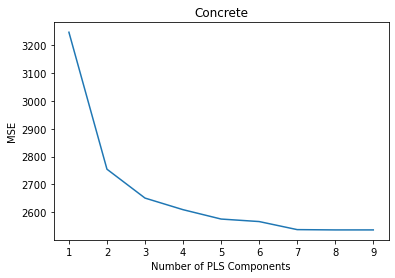

In [17]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X2), y2, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(np.arange(1, len(mse)+1), mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Concrete')

In [18]:
tic1 = time.perf_counter()

pls = PLSRegression(n_components=7)
pls.fit(X2_train, y2_train)

pls_score_row2 = pls.score(X2_test, y2_test)
pls_score_row2

toc1 = time.perf_counter()

In [19]:
pls = PLSRegression(n_components=7)
pls.fit(scale(X2_train), y2_train)

pls_score_scale2 = pls.score(scale(X2_test), y2_test)
pls_score_scale2

0.41523956842651133

In [20]:
pls = PLSRegression(n_components=7)
pls.fit(X2_train, y2_train)

y2_predict = pls.predict(X2_test)
pls_mse_row2 = mean_squared_error(y2_test, y2_predict)
pls_mse_row2

2701.033244082283

In [21]:
z = [x for _, x in sorted(zip(np.array(y2_test), y2_predict), key=lambda pair: pair[0])]
# np.array(z)[:, 0]

In [22]:
# np.sort(np.array(y_test)[:, 0])

In [23]:
mean_squared_error(np.array(z)[:, 0], np.sort(np.array(y2_test)[:, 0]))

2701.0332440822835

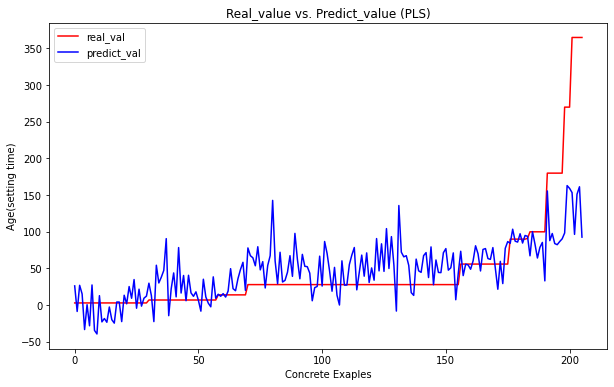

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y2_test)), np.sort(np.array(y2_test)[:, 0]), '-r', label='real_val')
plt.plot(range(len(y2_test)), np.array(z)[:, 0], '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Age(setting time)')
plt.title('Real_value vs. Predict_value (PLS)')
plt.legend()
plt.show()

In [25]:
print('PLS score on raw data:', pls_score_row2)
print('PLS score on scale data:', pls_score_scale2)
print('MSE for row data:', pls_mse_row2)
print(f"Running time in {toc1 - tic1:0.4f} seconds")

PLS score on raw data: 0.4210486896238359
PLS score on scale data: 0.41523956842651133
MSE for row data: 2701.033244082283
Running time in 0.0090 seconds


## KNN for compressive strength:

Text(0.5, 1.0, 'Concrete')

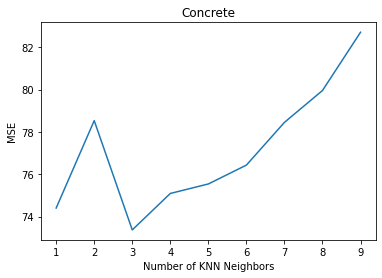

In [26]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []

# Calculate MSE using cross-validation
for i in np.arange(1, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = -1*model_selection.cross_val_score(knn, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of neighbors
plt.plot(np.arange(1, len(mse)+1), mse)
plt.xlabel('Number of KNN Neighbors')
plt.ylabel('MSE')
plt.title('Concrete')

In [27]:
tic1 = time.perf_counter()

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

knn_score_row = knn.score(X_test, y_test)
knn_score_row

toc1 = time.perf_counter()

In [28]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(scale(X_train), y_train)

knn_score_scale = knn.score(scale(X_test), y_test)
knn_score_scale

0.73172888289068

In [29]:
y_predict = knn.predict(scale(X_test))
knn_mse_scale = mean_squared_error(y_test, y_predict)
knn_mse_scale

70.65715097087379

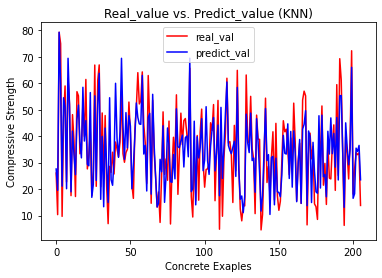

In [30]:
plt.plot(range(len(y_test)), y_test, '-r', label='real_val')
plt.plot(range(len(y_test)), y_predict, '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Compressive Strength')
plt.title('Real_value vs. Predict_value (KNN)')
plt.legend()
plt.show()

In [31]:
z = [x for _, x in sorted(zip(np.array(y_test), y_predict), key=lambda pair: pair[0])]
# np.array(z)[:, 0]

In [32]:
# np.sort(np.array(y_test)[:, 0])

In [33]:
mean_squared_error(np.array(z)[:, 0], np.sort(np.array(y_test)[:, 0]))

70.65715097087379

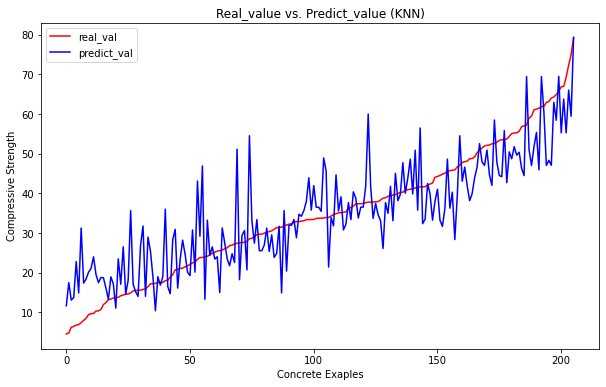

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), np.sort(np.array(y_test)[:, 0]), '-r', label='real_val')
plt.plot(range(len(y_test)), np.array(z)[:, 0], '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Compressive Strength')
plt.title('Real_value vs. Predict_value (KNN)')
plt.legend()
plt.show()

In [35]:
print('KNN score on raw data:', knn_score_row)
print('KNN score on scale data:', knn_score_scale)
print('MSE for scale data:', knn_mse_scale)
print(f"Running time in {toc1 - tic1:0.4f} seconds")

KNN score on raw data: 0.7113909347662772
KNN score on scale data: 0.73172888289068
MSE for scale data: 70.65715097087379
Running time in 0.0065 seconds


## KNN for setting time:

Text(0.5, 1.0, 'Concrete')

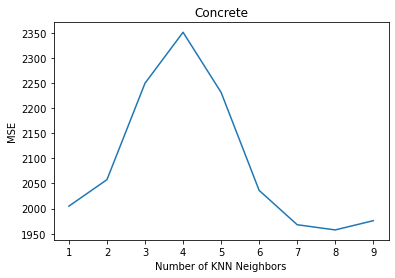

In [36]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []

# Calculate MSE using cross-validation
for i in np.arange(1, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = -1*model_selection.cross_val_score(knn, scale(X2), y2, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of neighbors
plt.plot(np.arange(1, len(mse)+1), mse)
plt.xlabel('Number of KNN Neighbors')
plt.ylabel('MSE')
plt.title('Concrete')

In [37]:
tic1 = time.perf_counter()

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X2_train, y2_train)

knn_score_row2 = knn.score(X2_test, y2_test)
knn_score_row2

toc1 = time.perf_counter()

In [38]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(scale(X2_train), y2_train)

knn_score_scale2 = knn.score(scale(X2_test), y2_test)
knn_score_scale2

0.4431863528350223

In [39]:
y2_predict = knn.predict(scale(X2_test))
knn_mse_scale2 = mean_squared_error(y2_test, y2_predict)
knn_mse_scale2

2597.752427184466

In [40]:
z = [x for _, x in sorted(zip(np.array(y2_test), y2_predict), key=lambda pair: pair[0])]
# np.array(z)[:, 0]

In [41]:
# np.sort(np.array(y_test)[:, 0])

In [42]:
mean_squared_error(np.array(z)[:, 0], np.sort(np.array(y2_test)[:, 0]))

2597.752427184466

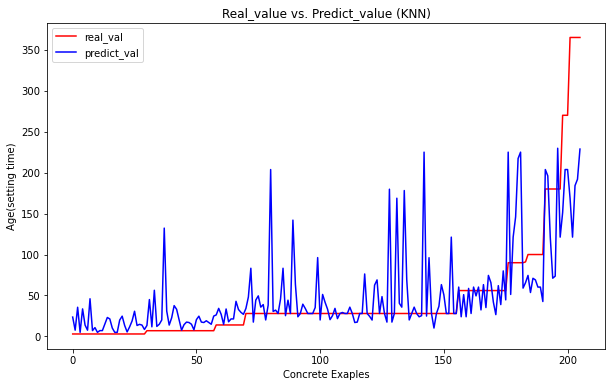

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y2_test)), np.sort(np.array(y2_test)[:, 0]), '-r', label='real_val')
plt.plot(range(len(y2_test)), np.array(z)[:, 0], '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Age(setting time)')
plt.title('Real_value vs. Predict_value (KNN)')
plt.legend()
plt.show()

In [44]:
print('KNN score on raw data:', knn_score_row2)
print('KNN score on scale data:', knn_score_scale2)
print('MSE for scale data:', knn_mse_scale2)
print(f"Running time in {toc1 - tic1:0.4f} seconds")

KNN score on raw data: 0.2966737227186462
KNN score on scale data: 0.4431863528350223
MSE for scale data: 2597.752427184466
Running time in 0.0067 seconds


## SVR (Support Vector Regression) for compressive strength:

Text(0.5, 1.0, 'Concrete')

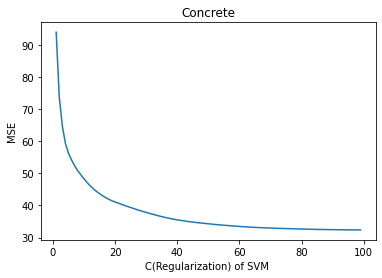

In [45]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 100):
    svr = svm.SVR(C = i)
    score = -1*model_selection.cross_val_score(svr, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(np.arange(1, len(mse)+1), mse)
plt.xlabel('C(Regularization) of SVM ')
plt.ylabel('MSE')
plt.title('Concrete')

In [46]:
tic1 = time.perf_counter()

svr = svm.SVR(C = 99)
svr.fit(X_train, y_train)

svr_score_row = svr.score(X_test, y_test)
svr_score_row

toc1 = time.perf_counter()

In [47]:
svr = svm.SVR(C = 99)
svr.fit(scale(X_train), y_train)

svr_score_scale = svr.score(scale(X_test), y_test)
svr_score_scale

0.8299080496954958

In [48]:
svr = svm.SVR(C=99)
svr.fit(scale(X_train), y_train)

y_predict = svr.predict(scale(X_test))
svr_mse_scale = mean_squared_error(y_test, y_predict)
svr_mse_scale

44.798757097277544

In [49]:
z = [x for _, x in sorted(zip(np.array(y_test), y_predict), key=lambda pair: pair[0])]
# np.array(z)[:, 0]

In [50]:
# np.sort(np.array(y_test)[:, 0])

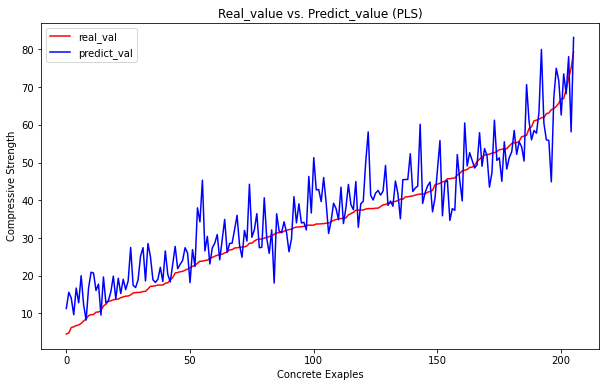

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), np.sort(np.array(y_test)[:, 0]), '-r', label='real_val')
plt.plot(range(len(y_test)), z, '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Compressive Strength')
plt.title('Real_value vs. Predict_value (PLS)')
plt.legend()
plt.show()

In [52]:
print('SVR score on raw data:', svr_score_row)
print('SVR score on scale data:', svr_score_scale)
print('MSE for row data:', svr_mse_scale)
print(f"Running time in {toc1 - tic1:0.4f} seconds")

SVR score on raw data: 0.7513044709823662
SVR score on scale data: 0.8299080496954958
MSE for row data: 44.798757097277544
Running time in 0.0536 seconds


## SVR for setting time:

Text(0.5, 1.0, 'Concrete')

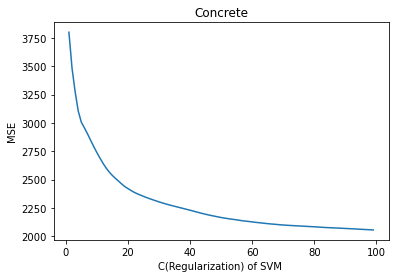

In [53]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 100):
    svr = svm.SVR(C = i)
    score = -1*model_selection.cross_val_score(svr, scale(X2), y2, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(np.arange(1, len(mse)+1), mse)
plt.xlabel('C(Regularization) of SVM ')
plt.ylabel('MSE')
plt.title('Concrete')

In [54]:
tic1 = time.perf_counter()

svr = svm.SVR(C = 99)
svr.fit(X2_train, y2_train)

svr_score_row2 = svr.score(X2_test, y2_test)
svr_score_row2

toc1 = time.perf_counter()

In [55]:
svr = svm.SVR(C = 99)
svr.fit(scale(X2_train), y2_train)

svr_score_scale2 = svr.score(scale(X2_test), y2_test)
svr_score_scale2

0.5249589325433852

In [56]:
svr = svm.SVR(C=99)
svr.fit(scale(X2_train), y2_train)

y2_predict = svr.predict(scale(X2_test))
svr_mse_scale2 = mean_squared_error(y2_test, y2_predict)
svr_mse_scale2

2216.2515094248197

In [57]:
z = [x for _, x in sorted(zip(np.array(y2_test), y2_predict), key=lambda pair: pair[0])]
# np.array(z)[:, 0]

In [58]:
# np.sort(np.array(y_test)[:, 0])

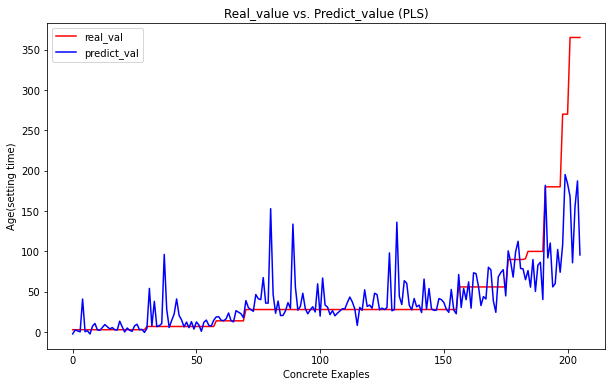

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y2_test)), np.sort(np.array(y2_test)[:, 0]), '-r', label='real_val')
plt.plot(range(len(y2_test)), z, '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Age(setting time)')
plt.title('Real_value vs. Predict_value (PLS)')
plt.legend()
plt.show()

In [60]:
print('SVR score on raw data:', svr_score_row2)
print('SVR score on scale data:', svr_score_scale2)
print('MSE for row data:', svr_mse_scale2)
print(f"Running time in {toc1 - tic1:0.4f} seconds")

SVR score on raw data: 0.0728420484120903
SVR score on scale data: 0.5249589325433852
MSE for row data: 2216.2515094248197
Running time in 0.0625 seconds


# Using PCA to preprocess dataset

In [61]:
pca = PCA()
pca_X = pca.fit_transform(scale(X))[:, :5]

In [62]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, y, test_size=0.2, random_state=0) 

In [63]:
pca.explained_variance_ratio_

array([0.28501242, 0.17700935, 0.16750988, 0.12676986, 0.1189385 ,
       0.09877443, 0.02223021, 0.00375535])

In [64]:
np.sum(pca.explained_variance_ratio_[:5])

0.87524000721786

Text(0.5, 1.0, 'score plot')

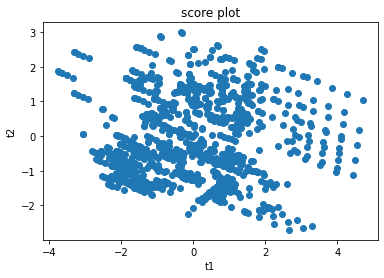

In [65]:
p1 = pca.components_[0]
p2 = pca.components_[1]
t1 = np.dot(scale(X), p1)
t2 = np.dot(scale(X), p2)

plt.scatter(t1, t2)
plt.xlabel('t1')
plt.ylabel('t2')
plt.title('score plot')

## SVR for compressive strength:

In [66]:
# #define cross-validation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# mse = []

# # Calculate MSE using cross-validation, adding one component at a time
# for i in np.arange(1, 100):
#     svr = svm.SVR(C = i)
#     score = -1*model_selection.cross_val_score(svr, pca_X, y, cv=cv,
#                scoring='neg_mean_squared_error').mean()
#     mse.append(score)

# #plot test MSE vs. number of components
# plt.plot(np.arange(1, len(mse)+1), mse)
# plt.xlabel('C(Regularization) of SVM ')
# plt.ylabel('MSE')
# plt.title('Concrete')

In [67]:
tic1 = time.perf_counter()

svr = svm.SVR(C = 99)
svr.fit(pca_X_train, pca_y_train)

svr_score_pca = svr.score(pca_X_test, pca_y_test)
svr_score_pca

toc1 = time.perf_counter()

In [68]:
y_predict = svr.predict(pca_X_test)
svr_mse_pca = mean_squared_error(pca_y_test, y_predict)
svr_mse_pca

101.3026799957818

In [69]:
z = [x for _, x in sorted(zip(np.array(y_test), y_predict), key=lambda pair: pair[0])]

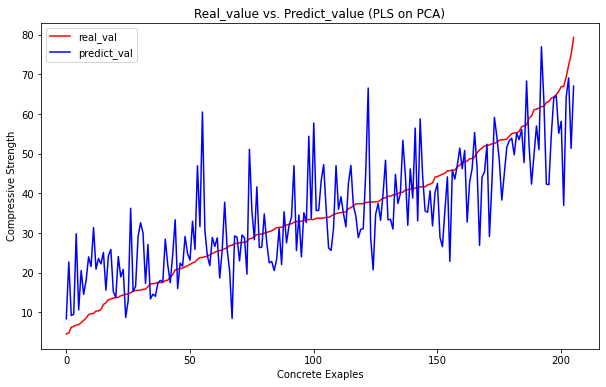

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), np.sort(np.array(y_test)[:, 0]), '-r', label='real_val')
plt.plot(range(len(y_test)), z, '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Compressive Strength')
plt.title('Real_value vs. Predict_value (PLS on PCA)')
plt.legend()
plt.show()

In [71]:
print('SVR score on PCA data:', svr_score_pca)
print('MSE for PCA data:', svr_mse_pca)
print(f"Running time in {toc1 - tic1:0.4f} seconds")

SVR score on PCA data: 0.6153739182062543
MSE for PCA data: 101.3026799957818
Running time in 0.0816 seconds


# Using SFS to preprocess dataset

In [72]:
# knn = KNeighborsRegressor(n_neighbors=3)
# sfs = SequentialFeatureSelector(knn, 
#                                 n_features_to_select=4, 
#                                 direction='forward', 
#                                 scoring='neg_mean_squared_error')
# sfs_X = sfs.fit_transform(X, y)

In [73]:
# sfs.get_support(indices=True)

In [74]:
# X.columns[sfs.get_support(indices=True)]

In [75]:
def my_sfs(X, y, model, k_features):
    assert(k_features <= len(X.columns))
    X_selection = np.empty((0, len(X.index)))
    best_feature = np.array([])
    for i in range(k_features): # for loop to find k features
        error = np.array([]) # this error array contains total error for each col and select the col with min error
        j=0
        for col in X.columns:
            if not j in best_feature: # if tmp col selected in the best_feature, no need to check it again
                tmp_X = np.append(X_selection, np.array([X[col]]), axis = 0) # combine tmp col with best_features
                tmp_X = pd.DataFrame(tmp_X.T)
                model.fit(tmp_X, y)
                prediction = model.predict(tmp_X)
                error = np.append(error, mean_squared_error(y, prediction) ) # fit and get error for this col
            else:
                error = np.append(error, math.inf) # if tmp col in best_feature, set infinite error, will not be selected
            j=j+1
        best_feature = np.append(best_feature, np.argmin(error)) # add col index to best_feature
        X_selection = np.append(X_selection, np.array([X[X.columns[best_feature[-1]]]]), axis = 0) # add col to X_selected
    return pd.DataFrame(X_selection.T), best_feature

In [76]:
knn = KNeighborsRegressor(n_neighbors=3)
svr = svm.SVR(C = 100)
X_selection, best_feature = my_sfs(X, y, svr, 8)

In [77]:
best_feature.astype(int)

array([7, 0, 1, 3, 2, 4, 6, 5])

In [78]:
X.columns[best_feature.astype(int)]

Index(['Age', 'Cement', 'Blast Furnace Slag', 'Water', 'Fly Ash',
       'Superplasticizer', 'Fine Aggregate', 'Coarse Aggregate'],
      dtype='object')

In [79]:
my_sfs_X = X[ X.columns[best_feature.astype(int)[:4]] ]
my_sfs_X

,Age,Cement,Blast Furnace Slag,Water
0,28,540.0,0.0,162.0
1,28,540.0,0.0,162.0
2,270,332.5,142.5,228.0
3,365,332.5,142.5,228.0
4,360,198.6,132.4,192.0
...,...,...,...,...
1025,28,276.4,116.0,179.6
1026,28,322.2,0.0,196.0
1027,28,148.5,139.4,192.7
1028,28,159.1,186.7,175.6


In [80]:
sfs_X_train, sfs_X_test, sfs_y_train, sfs_y_test = train_test_split(my_sfs_X, y, test_size=0.2, random_state=0) 

## SVR for compressive strength:

In [81]:
# #define cross-validation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# mse = []

# # Calculate MSE using cross-validation, adding one component at a time
# for i in np.arange(1, 100):
#     svr = svm.SVR(C = i)
#     score = -1*model_selection.cross_val_score(svr, sfs_X, y, cv=cv,
#                scoring='neg_mean_squared_error').mean()
#     mse.append(score)

# #plot test MSE vs. number of components
# plt.plot(np.arange(1, len(mse)+1), mse)
# plt.xlabel('C(Regularization) of SVM ')
# plt.ylabel('MSE')
# plt.title('Concrete')

In [82]:
tic1 = time.perf_counter()

svr = svm.SVR(C = 99)
svr.fit(sfs_X_train, sfs_y_train)

svr_score_sfs = svr.score(sfs_X_test, sfs_y_test)
svr_score_sfs

toc1 = time.perf_counter()

In [83]:
y_predict = svr.predict(sfs_X_test)
svr_mse_sfs = mean_squared_error(sfs_y_test, y_predict)
svr_mse_sfs

46.91543393747013

In [84]:
z = [x for _, x in sorted(zip(np.array(y_test), y_predict), key=lambda pair: pair[0])]

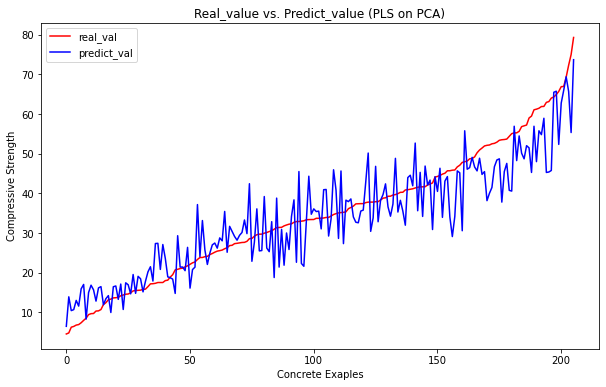

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), np.sort(np.array(y_test)[:, 0]), '-r', label='real_val')
plt.plot(range(len(y_test)), z, '-b', label='predict_val')
plt.xlabel('Concrete Exaples')
plt.ylabel('Compressive Strength')
plt.title('Real_value vs. Predict_value (PLS on PCA)')
plt.legend()
plt.show()

In [86]:
print('SVR score on SFS data:', svr_score_sfs)
print('MSE for SFS data:', svr_mse_sfs)
print(f"Running time in {toc1 - tic1:0.4f} seconds")

SVR score on SFS data: 0.82187144968155
MSE for SFS data: 46.91543393747013
Running time in 0.0632 seconds
